Al-Imam Mohammad Ibn Saud Islamic University <br>
<font color = "Lightblue"> College of Computer & Information Sciences<br>
Computer Sciences Department</font>

 CS464 - Deep learning <br> Winter 22-23 - Second Semester | Take-home exam

---

>Instructor :

Dr. Haifa Alkasem

#Content of table:

---
[1. Dataset](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=Ybn781cpsEVE&line=2&uniqifier=1)

[2. Dataset](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=6I8RCNMZyhjM&line=2&uniqifier=1)
  
[3. Importing all necessary libraries](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=RxrzrvLTlOpu)
   
[4. Spilt folder and discover data](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=H8fj86D1lR2K&line=1&uniqifier=1)


[5. Imbalanced dataset](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=IxDRwu9B6HqQ&line=3&uniqifier=1)

[6. Load data](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=f50XZzhbvHEo)

[7. Building my CNN model](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=nvK7MvlQrYEi)

[8. Output](https://colab.research.google.com/drive/1VfxgpBHeMJ20DE7oKH507xNCNsIYze93?authuser=1#scrollTo=ivCLxukHrebn)




## Dataset:
A dataset is a group of chest X-ray images labeled as normal or pneumonia(a lung disease). There are 5,856 X-Ray chest images, 1583 normal images, and 4273 pneumonia. Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.


![An image](https://k.top4top.io/p_2578qiyd71.png)

[from Kaggle Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)


## Problem: 
It is a classification problem to help the medical field to help identify pneumonia quicly.

In [22]:
# Access to google drive files
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing all necessary libraries

In [23]:
# install all packages required
!pip install Augmentor
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Import all required packages
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas
import Augmentor
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import confusion_matrix
import splitfolders
from keras.utils.vis_utils import plot_model
import cv2

## Spilt folder and discover data
**Train** set for train model, **test** for the testing trained model, and **validation** set to evaluate results from the training set for each epoch. First, I try to use 80% of the data set image to train, 10% to test, and 10% to validation gives a good result. Because of time, I didn't try another spilt.

The original spilt of data set it doesn't try it, But I collect all images of one class from the train, test and validation folder and put them in fulldata folder, then I using splitfolders package.

In [ ]:
# Spilt folder sith ratio (input_folder, output_folder, ratio(train, test, val))
splitfolders.ratio("/content/drive/MyDrive/DLproject/full_data", output="/content/drive/MyDrive/DLproject/Data",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 5856 files [01:38, 59.63 files/s]


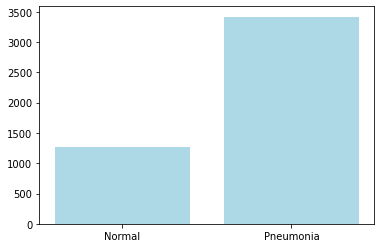

In [ ]:
# Count number of images in dataset and display the result using Barplot by matplotlib
# Normal
number_normal = len(os.listdir('/content/drive/MyDrive/DLproject/Data/train/NORMAL'))
# Pneumonia
number_pneumonia = len(os.listdir('/content/drive/MyDrive/DLproject/Data/train/PNEUMONIA'))

# Bar plot 
data = {'Normal':number_normal, 'Pneumonia':number_pneumonia}

classes = list(data.keys())
values = list(data.values())

# creating the bar plot
plt.bar(classes, values, color ='lightblue')

## Imbalanced dataset

In the beginning we must define what the Imbalanced data which is the classification categories are not approximately equally represented or skewed class proportions. One of the solutions to balance data is data augmentation which is a process to increase the number of images using the same image with different transformations or using deep learning techniques. By using Augmentor package.

In [ ]:
# from Augmentor package we augment the normal class to be close to pneumonia
aug_data = Augmentor.Pipeline("/content/drive/MyDrive/DLproject/Data/train/NORMAL")

Initialised with 1266 image(s) found.
Output directory set to /content/drive/MyDrive/DLproject/Data/train/NORMAL/output.

In [ ]:
# adding operations on pipeline 
# skew(probability to do it) 
aug_data.skew_tilt(probability=0.5)
# flip left or right(probability to do it) 
aug_data.flip_left_right(probability=0.4)
# number of sample to create
aug_data.sample(number_pneumonia-number_normal)

Processing <PIL.Image.Image image mode=L size=1748x1442 at 0x7EFC32C2BA00>: 100%|██████████| 2152/2152 [03:29<00:00, 10.26 Samples/s]


<BarContainer object of 2 artists>

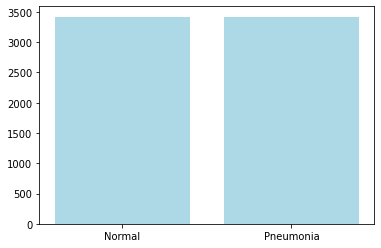

In [ ]:
number_normal = len(os.listdir('/content/drive/MyDrive/DLproject/Data/train/NORMAL'))
# Pneumonia
number_pneumonia = len(os.listdir('/content/drive/MyDrive/DLproject/Data/train/PNEUMONIA'))

# Bar plot 

data = {'Normal':number_normal, 'Pneumonia':number_pneumonia}

classes = list(data.keys())
values = list(data.values())

# creating the bar plot
plt.bar(classes, values, color ='lightblue')

## Load the dataset

In [25]:
# path of data folders
train_folder = '/content/drive/MyDrive/DLproject/Data/train'
test_folder = '/content/drive/MyDrive/DLproject/Data/test'
val_folder = '/content/drive/MyDrive/DLproject/Data/val'

In [26]:
# batch size
batch_size = 32
# image high and width
img_size = 229

# generate the dataset from directory that take path of folder, image size, batch size.
train_data = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  image_size=(img_size, img_size),
  batch_size=batch_size,
  color_mode = 'rgb',
  label_mode = 'binary')

test_data = tf.keras.utils.image_dataset_from_directory(
  test_folder,
  image_size=(img_size, img_size),
  batch_size=batch_size,
    color_mode = 'rgb',
  label_mode = 'binary')

val_data = tf.keras.utils.image_dataset_from_directory(
  val_folder,
  image_size=(img_size, img_size),
  batch_size=batch_size,
    color_mode = 'rgb',
  label_mode = 'binary')

Found 6838 files belonging to 2 classes.
Found 587 files belonging to 2 classes.
Found 585 files belonging to 2 classes.


In [27]:
# number of class
labels = ['NORMAL','PNEUMONIA']
labels

['NORMAL', 'PNEUMONIA']

In [28]:
# convert the data to numpy array to use it later. | ref: https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy#Training-the-Model

def data_from_dir(data_dir): 
  # take all data image/ label
  data = []
  for label in labels:
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img))
        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data)

# calling data_from_dir and send the path of folder 
train_ds = data_from_dir(train_folder)
test_ds = data_from_dir(test_folder)
valid_ds = data_from_dir(val_folder)


# from np.array to noraml list to add x> image y>label
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train_ds:
  x_train.append(feature)
  y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

for feature, label in valid_ds:
  x_val.append(feature)
  y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

for feature, label in test_ds:
  x_test.append(feature)
  y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

<ipython-input-28-cff8fe29b8fa>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


## Building CNN model

In [29]:
# create an augmentation layer 
data_augmentation = tf.keras.Sequential([
  layers.Rescaling(1./255),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [30]:
# create a CNN mddel 
model = tf.keras.Sequential([
  data_augmentation,
  # convolution layer with 32 filters, 3x3 filter, no padding, and activation function relu
  layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(img_size, img_size)),
  # max pooling layer with 2x2
  layers.MaxPooling2D(pool_size=(2, 2)),
  # convolution layer with 64 filters, 3x3 filter, no padding, and activation function relu
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # max pooling layer with 2x2
  layers.MaxPooling2D(pool_size=(2, 2)),
  # convolution layer with 128 filters, 3x3 filter, no padding, and activation function relu
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  # max pooling layer with 2x2
  layers.MaxPooling2D(pool_size=(2, 2)),
  # convolution layer with 64 filters, 3x3 filter, no padding, and activation function relu
  # from 2D to 1D usign a flatten layer
  layers.Flatten(),
  # fully connected layer
  # with 128 unit of dimensionality of the output space
  layers.Dense(128, activation='relu'),
  # with 64 unit of dimensionality of the output space
  layers.Dense(64, activation='relu'),
  # with 32 unit of dimensionality of the output space
  layers.Dense(32, activation='relu'),
  # with 1(binary, normal or penumena) unit of dimensionality of the output space
  layers.Dense(1)])


In [31]:
# Configures the model for training with optimizer adam(0.001 learning rate) , loss function binary Crossentropy, and accuracy metric.
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(
#     log_dir='./logs', write_images = True, histogram_freq=1)

In [33]:
# fitting the model to train set and validation , epochs
mid_model = model.fit(
  train_data,
  validation_data=val_data,
  epochs=20
  # ,callbacks=[tensorboard_callback]
)

Epoch 1/20
214/214 [==============================] - 55s 246ms/step - loss: 0.5207 - accuracy: 0.6955 - val_loss: 0.4390 - val_accuracy: 0.7487
Epoch 2/20
214/214 [==============================] - 54s 246ms/step - loss: 0.3095 - accuracy: 0.8681 - val_loss: 0.1968 - val_accuracy: 0.9094
Epoch 3/20
214/214 [==============================] - 53s 239ms/step - loss: 0.2654 - accuracy: 0.8960 - val_loss: 0.1930 - val_accuracy: 0.9214
Epoch 4/20
214/214 [==============================] - 53s 238ms/step - loss: 0.2431 - accuracy: 0.9070 - val_loss: 0.1655 - val_accuracy: 0.9368
Epoch 5/20
214/214 [==============================] - 52s 237ms/step - loss: 0.2290 - accuracy: 0.9120 - val_loss: 0.2582 - val_accuracy: 0.8530
Epoch 6/20
214/214 [==============================] - 52s 237ms/step - loss: 0.2268 - accuracy: 0.9092 - val_loss: 0.1956 - val_accuracy: 0.9111
Epoch 7/20
214/214 [==============================] - 52s 237ms/step - loss: 0.2119 - accuracy: 0.9204 - val_loss: 0.1730 - val_ac

In [34]:
# print the summary of model 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 229, 229, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 229, 229, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 114, 114, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 114, 114, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 57, 57, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 128)      

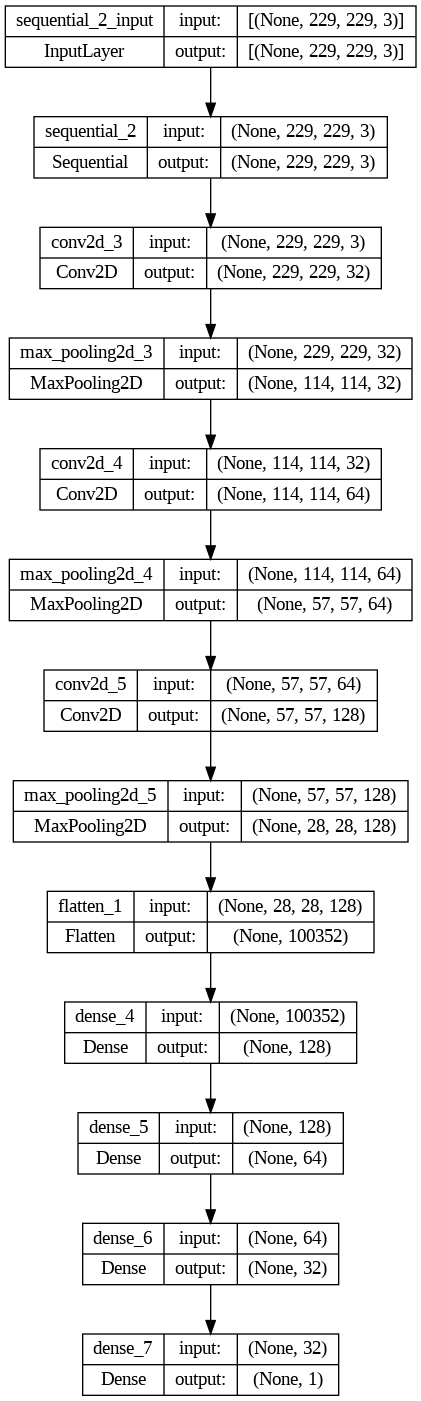

In [35]:
# print the CNN model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, rankdir="TB", show_layer_names=True)

In [36]:
# Evalute the model accuracy on test set
test_accu = model.evaluate(test_data)
print('The testing accuracy is :',test_accu[1]*100, '%')

19/19 [==============================] - 4s 120ms/step - loss: 0.1483 - accuracy: 0.9404
The testing accuracy is : 94.03747916221619 %


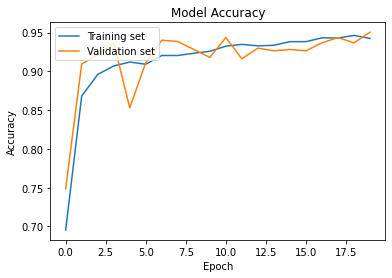

In [37]:
# Model accuracy
plt.plot(mid_model.history['accuracy'])
plt.plot(mid_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

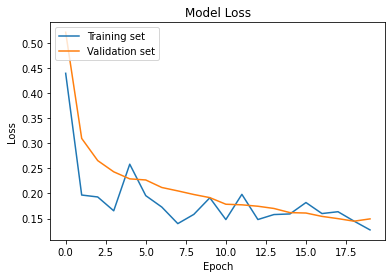

In [38]:
# Model loss
plt.plot(mid_model.history['val_loss'])
plt.plot(mid_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

## Output

Y_pred is a values, so if >= 0.5 will be: 'PNEUMONIA' else :'NORMAL'

In [39]:
# predict the test set
Y_pred = model.predict(test_data)
values = []

for y in Y_pred:
  if y >= 0.5:
    pred = 1
  else : 
    pred = 0
  values.append(pred)

y_pred = np.array(values)
y_pred

19/19 [==============================] - 4s 111ms/step


array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [40]:
len(y_pred)

587

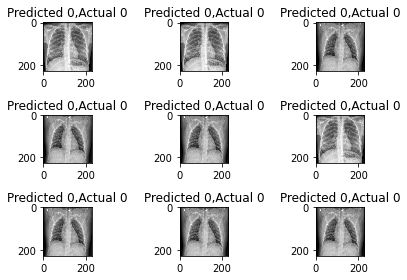

In [41]:
# Display the pictures and the output of 9 pic
i = 0
for c in y_pred[:9]:
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c], cmap="gray", interpolation='none')
    plt.title("Predicted {},Actual {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

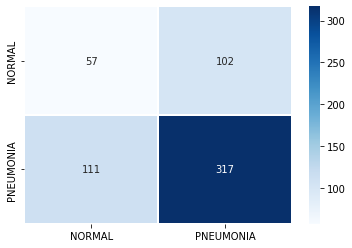

In [42]:
# Confuison matrix of each prdiected
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap= "Blues", linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

## Gradient vanishing 

In [ ]:
#%load_ext tensorboard


In [ ]:
#%tensorboard --logdir=/content/logs --load_fast=true  --bind_all

